In [1]:
# standard DS imports
import pandas as pd
import numpy as np

# viz and stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# scaling and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# local functions
import wrangle
import model

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/2388559aef7a0700eb31e7604351364b16e99653/mall_customers.csv', index_col="customer_id")

In [3]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.groupby('gender').agg(['min', 'max', 'median', 'std', 'mean']).T

gender                     Female        Male
age            min      18.000000   18.000000
               max      68.000000   70.000000
               median   35.000000   37.000000
               std      12.644095   15.514812
               mean     38.098214   39.806818
annual_income  min      16.000000   15.000000
               max     126.000000  137.000000
               median   60.000000   62.500000
               std      26.011952   26.638373
               mean     59.250000   62.227273
spending_score min       5.000000    1.000000
               max      99.000000   97.000000
               median   50.000000   50.000000
               std      24.114950   27.896770
               mean     51.526786   48.511364

In [5]:
df = df.drop(columns='gender')

In [6]:
df.head()

,age,annual_income,spending_score
customer_id,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [7]:
train = df.copy()

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             200 non-null    int64
 1   annual_income   200 non-null    int64
 2   spending_score  200 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [9]:
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train),
                           index=train.index,
                           columns = train.columns)

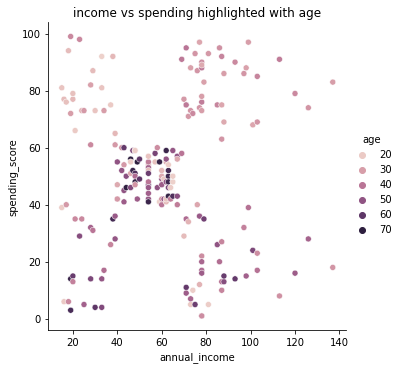

In [10]:
sns.relplot(data=train, x='annual_income', y='spending_score', hue='age').set(title='income vs spending highlighted with age')

In [11]:
km = KMeans(n_clusters=5)
km.fit(train_scaled)
train['cluster'] = km.predict(train_scaled)

In [12]:
train.cluster.value_counts()

2    58
1    49
0    40
3    30
4    23
Name: cluster, dtype: int64

In [13]:
km.inertia_

10.30396489253412

In [14]:
km.n_iter_

8

In [15]:
{k: KMeans(k).fit(train_scaled).inertia_ for k in range(2,16)}

{2: 22.56077488260975,
 3: 17.370109472896697,
 4: 12.650287676229912,
 5: 10.30396489253412,
 6: 8.385099035848986,
 7: 7.194627451966417,
 8: 6.248886770318165,
 9: 5.4970081248101526,
 10: 5.01636210036839,
 11: 4.552314677723878,
 12: 4.215650721648608,
 13: 3.9108450381023854,
 14: 3.7257761836059764,
 15: 3.548065360538315}

In [16]:
n = 1
points = {}
while n < 15:
    km = KMeans(n_clusters = n)
    km.fit(train_scaled)
    points[f'km_{n}'] = {'centroids':n, 'inertia': km.inertia_}
    n+=1

In [17]:
models = pd.DataFrame(points).T
models

,centroids,inertia
km_1,1.0,37.401482
km_2,2.0,22.560775
km_3,3.0,17.371946
km_4,4.0,12.650288
km_5,5.0,10.303965
km_6,6.0,8.399423
km_7,7.0,7.171965
km_8,8.0,6.289526
km_9,9.0,5.496248
km_10,10.0,5.031642


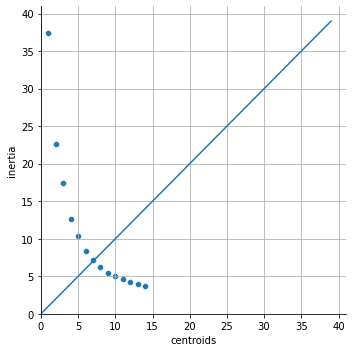

In [25]:
sns.relplot(data=models, x='centroids', y='inertia')
x = range(0,40,1)
y = range(0,40,1)
plt.plot(x,y)
plt.xlim(0)
plt.ylim(0)
plt.grid()
plt.show()

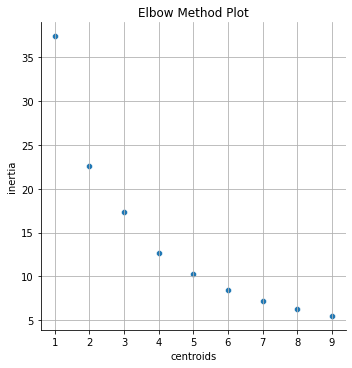

In [27]:
model.run_kmeans(train_scaled, max_centroids=9)